    To give a first impression with the versatility you fulfill as a Process Mining Expert within The Company, we have put together an assignment. This is fictitious but gives you the opportunity to be able to show a little more of yourself. The following case has been prepared for this purpose:
    Case Green Air Inc.
    You have been invited by the company Green Air Inc. to analyze the procurement process for them with process mining. According to the internal stakeholders, the process currently takes too long, and it is suspected that procedures are not always followed. It is suspected that this is costing the company a lot of money and (lead time).
    After an initial discussion with the process owner, it becomes clear that this is how the standard (agreed upon) process should run:

    Create PR: Create Purchase Requisition.
    Authorize PR: Authorize Purchase Requisition.
    Create PO: Create Purchase Order. 
    Authorize & Send PO: Authorize & Send Purchase Order (approve purchase order and send purchase order to supplier).
    Receive Goods: Receive goods/services.
    After this interview, you will be sent the transactions for a given period from the ERP system (see attachments to this document) so that you can examine the process in more detail. 

    You will be asked to analyze the data, and visualize/explain the following in a presentation.  
    
    - Does the process always run as it should?
    - What variants do you see? And how often do they occur?
    - Are there any conflicts in terms of separation of functions?
    - What opportunities for process optimization do you identify? 
    - What improvement initiatives would you suggest?
    - What information would you still like to receive from Green Air Inc.?
    
    For the analysis, we ask you to use Celonis Snap. A free account can be created via the following link: 
    https://signup.celonis.com/ui/sign-up/get-started


### Import the relevant libraries

In [215]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Basic checks

In [216]:
#pip install openpyxl

In [217]:
df = pd.read_excel(r"C:\Users\lily\Desktop\DS interview prep\Inno\2022_Data Set Case Green Air (1).xlsx")

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   CaseID                       438 non-null    int64         
 1   PR_Number                    375 non-null    float64       
 2   PO_Number                    427 non-null    float64       
 3   Create PR                    375 non-null    datetime64[ns]
 4   Authorize PR                 370 non-null    datetime64[ns]
 5   Reject PR                    5 non-null      datetime64[ns]
 6   Create Purchase Order        427 non-null    datetime64[ns]
 7   Auth Send PO                 400 non-null    datetime64[ns]
 8   Reject PO                    24 non-null     datetime64[ns]
 9   Receive Goods                406 non-null    datetime64[ns]
 10  Actor_Create PR              375 non-null    object        
 11  Actor_Authorize PR           370 non-null    

In [219]:
df.head()

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,Actor_Create PR,Actor_Authorize PR,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur)
0,1001,30100052.0,40300106.0,2020-10-01 08:26:00,2020-10-03 18:33:00,NaT,2020-10-04 11:04:00,2020-10-04 16:39:00,NaT,2020-10-27 15:24:00,ThijsvdB,Eduard,NaN,JokeF,RobvdL,NaN,SonjaL,Condax,Hydraulic,1353.67
1,1002,30100079.0,40300108.0,2020-10-01 07:19:00,2020-10-02 19:32:00,NaT,2020-10-04 14:29:00,2020-10-06 10:40:00,NaT,2020-10-11 16:01:00,ArieV,JohnK,NaN,MauricedB,EdjeK,NaN,PeterL,Lexiqvolax,Electric,1532.59
2,1003,30100101.0,40300109.0,2020-10-01 07:36:00,2020-10-03 22:57:00,NaT,2020-10-04 11:45:00,2020-10-09 11:42:00,NaT,2020-10-23 11:42:00,TonyB,JohnK,NaN,MauricedB,FritsS,NaN,OlafO,Golddex,Hydraulic,8746.77
3,1004,30100050.0,40300111.0,2020-10-01 12:53:00,2020-10-02 10:36:00,NaT,2020-10-05 08:45:00,2020-10-11 11:36:00,NaT,2020-10-21 11:36:00,TonyB,JohnK,NaN,MauricedB,FritsS,NaN,PeterL,Openlane,Electric,749.00
4,1005,30100057.0,40300112.0,2020-10-01 15:51:00,2020-10-05 19:34:00,NaT,2020-10-05 23:28:00,2020-10-11 08:35:00,NaT,2020-10-15 09:55:00,ThijsvdB,JohnK,NaN,JokeF,FritsS,NaN,OlafO,year-job,Tools,429.08


In [220]:
duplicates = df.duplicated()
duplicates.sum()

0

### Exploratory Data Analysis

In [221]:
totalcase = df['CaseID'].nunique()
totalcase 

438

In [222]:
df['PO_Number'].nunique()

427

In [223]:
df['PR_Number'].nunique()

375

In [224]:
df.columns

Index(['CaseID', 'PR_Number', 'PO_Number', 'Create PR', 'Authorize PR',
       'Reject PR', 'Create Purchase Order', 'Auth Send PO', 'Reject PO',
       'Receive Goods', 'Actor_Create PR', 'Actor_Authorize PR',
       'Actor_Reject PR', 'Actor_Create Purchase Order', 'Actor_Auth Send PO',
       'Actor_Reject PO', 'Actor_Receive Goods', 'Supplier Name',
       'Material Group', 'Purchase Value (eur)'],
      dtype='object')

In [225]:
actors = df[['Actor_Create PR', 'Actor_Authorize PR',
       'Actor_Reject PR', 'Actor_Create Purchase Order', 'Actor_Auth Send PO',
       'Actor_Reject PO', 'Actor_Receive Goods']]

Column: Actor_Create PR
Actor_Create PR
ArieV       155
KlaasvdW    103
TonyB        60
ThijsvdB     57
Name: count, dtype: int64


Column: Actor_Authorize PR
Actor_Authorize PR
JohnK     211
Bouke     100
Eduard     59
Name: count, dtype: int64


Column: Actor_Reject PR
Actor_Reject PR
JohnK     3
Eduard    1
Bouke     1
Name: count, dtype: int64


Column: Actor_Create Purchase Order
Actor_Create Purchase Order
EdjeK        157
MauricedB    130
KarinH        91
JokeF         49
Name: count, dtype: int64


Column: Actor_Auth Send PO
Actor_Auth Send PO
FritsS    161
RobvdL    157
EdjeK      82
Name: count, dtype: int64


Column: Actor_Reject PO
Actor_Reject PO
RobvdL    14
FritsS    10
Name: count, dtype: int64


Column: Actor_Receive Goods
Actor_Receive Goods
OlafO         161
PeterL         68
JoostP         65
MauritsvdR     43
SonjaL         29
EdjeK          24
FransW         16
Name: count, dtype: int64




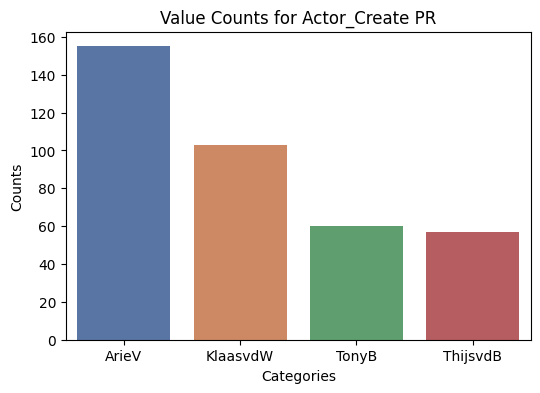

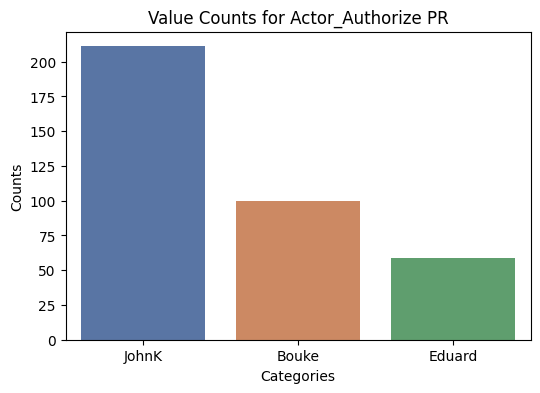

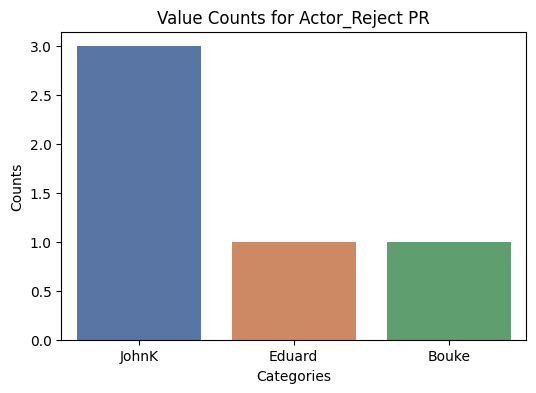

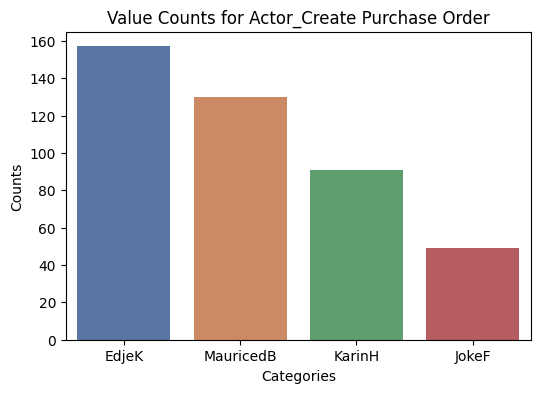

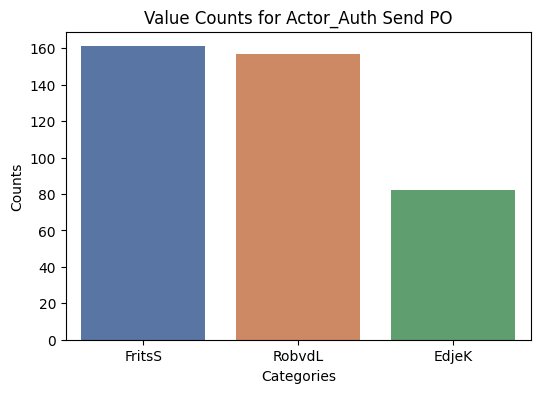

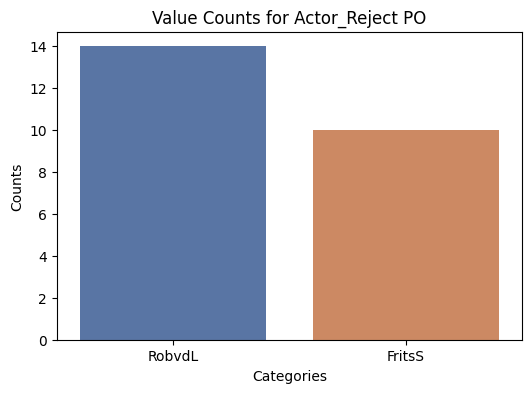

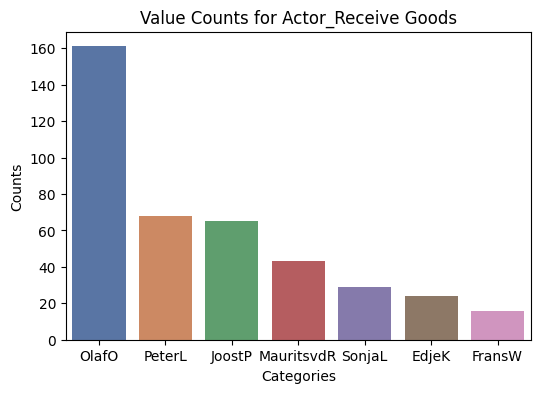

In [226]:
for col in actors:
    value_counts = df[col].value_counts()
    print(f"Column: {col}")
    print(value_counts)
    print("\n")
    
    plt.figure(figsize=(6,4))
    sns.barplot(x=value_counts.index, y=value_counts.values, palette=sns.color_palette("deep"))
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.title(f'Value Counts for {col}')

In [227]:
df['Purchase Value (eur)'].sum()

823205.8

C:\Users\lily\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot: xlabel='Purchase Value (eur)', ylabel='Count'>

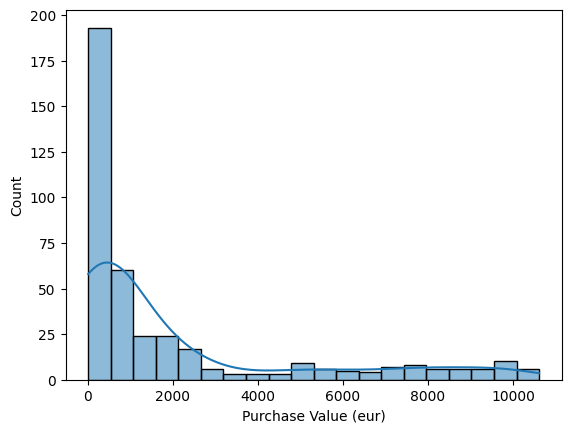

In [228]:
sns.histplot(x=df['Purchase Value (eur)'], kde=True)

In [229]:
category_spend = df.groupby('Material Group')['Purchase Value (eur)'].sum().sort_values()
category_spend 

Material Group
Miscellaneous         15658.95
Fuel & Lubricants     15925.51
Tools                 34020.65
Electric             105625.16
Mechanical           215791.01
Hydraulic            436184.52
Name: Purchase Value (eur), dtype: float64

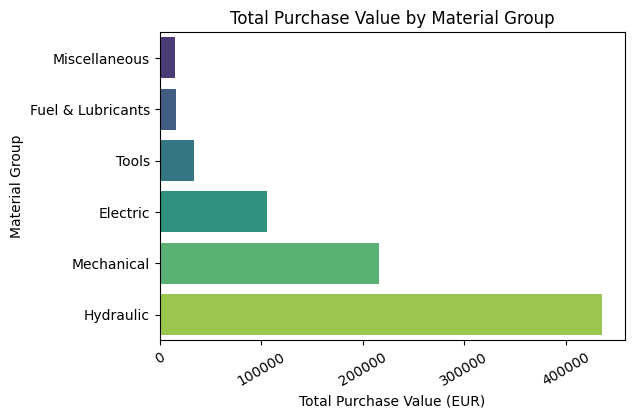

In [230]:
plt.figure(figsize=(6,4))
sns.barplot(x=category_spend.values, y=category_spend.index, palette='viridis')
plt.xlabel('Total Purchase Value (EUR)')
plt.ylabel('Material Group')
plt.title('Total Purchase Value by Material Group')
plt.xticks(rotation=30)
plt.show()

In [231]:
category_POs = df.groupby('Material Group')['PO_Number'].count().sort_values()
category_POs 

Material Group
Miscellaneous        26
Mechanical           34
Hydraulic            71
Tools                86
Electric             89
Fuel & Lubricants    94
Name: PO_Number, dtype: int64

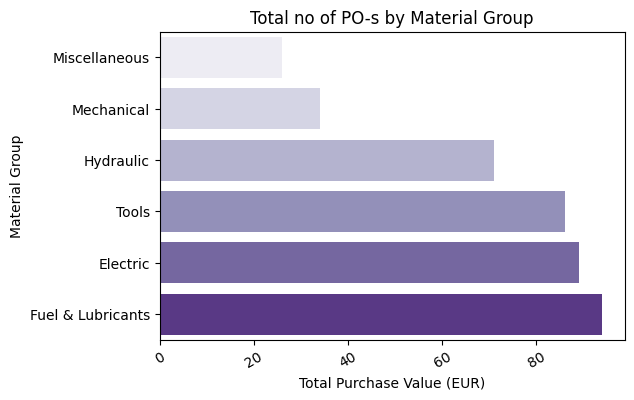

In [232]:
plt.figure(figsize=(6,4))
sns.barplot(x=category_POs.values, y=category_POs.index, palette=sns.color_palette("Purples"))
plt.xlabel('Total Purchase Value (EUR)')
plt.ylabel('Material Group')
plt.title('Total no of PO-s by Material Group')
plt.xticks(rotation=30)
plt.show()

In [233]:
df.groupby(['Material Group', 'Supplier Name'])['Purchase Value (eur)'].sum().reset_index().head(25)

,Material Group,Supplier Name,Purchase Value (eur)
0,Electric,Condax,978.29
1,Electric,Donquadtech,1315.71
2,Electric,Gogozoom,1382.60
3,Electric,Golddex,2390.96
4,Electric,Goodsilron,739.40
5,Electric,Lexiqvolax,1532.59
6,Electric,Nam-zim,5375.15
7,Electric,Openlane,64860.53
8,Electric,Opentech,1359.98
9,Electric,Y-corporation,6137.36


In [234]:
df['Supplier Name'].nunique()

17

*Comment: 17 suppliers in several categories*

**Defining the melt function parameters and melt()**

In [235]:
remain = ['CaseID', 'PR_Number', 'PO_Number', 'Supplier Name', 'Material Group', 'Purchase Value (eur)']

activities = ['Create PR', 'Authorize PR', 'Reject PR', 'Create Purchase Order', 'Auth Send PO', 'Reject PO', 'Receive Goods']

df2 = pd.melt(df, id_vars=remain, value_vars=activities,var_name='Activity', value_name='Timestamp')

In [236]:
df2.head()

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp
0,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create PR,2020-10-01 08:26:00
1,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Create PR,2020-10-01 07:19:00
2,1003,30100101.0,40300109.0,Golddex,Hydraulic,8746.77,Create PR,2020-10-01 07:36:00
3,1004,30100050.0,40300111.0,Openlane,Electric,749.00,Create PR,2020-10-01 12:53:00
4,1005,30100057.0,40300112.0,year-job,Tools,429.08,Create PR,2020-10-01 15:51:00


**Adding the actors**

In [237]:
actors = ['Actor_Create PR', 'Actor_Authorize PR', 'Actor_Reject PR', 'Actor_Create Purchase Order', 'Actor_Auth Send PO', 'Actor_Reject PO', 'Actor_Receive Goods']

In [238]:
actor_dict = dict(zip(activities, actors))

In [239]:
df2['Actor'] = df2['Activity'].map(actor_dict)

for activity, actor_col in actor_dict.items():
    df2.loc[df2['Activity'] == activity, 'Actor'] = df[actor_col].values

In [240]:
df2.head()

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
0,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create PR,2020-10-01 08:26:00,ThijsvdB
1,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Create PR,2020-10-01 07:19:00,ArieV
2,1003,30100101.0,40300109.0,Golddex,Hydraulic,8746.77,Create PR,2020-10-01 07:36:00,TonyB
3,1004,30100050.0,40300111.0,Openlane,Electric,749.00,Create PR,2020-10-01 12:53:00,TonyB
4,1005,30100057.0,40300112.0,year-job,Tools,429.08,Create PR,2020-10-01 15:51:00,ThijsvdB


**Reorder, reindex**

In [241]:
activities = ['Create PR', 'Reject PR', 'Authorize PR', 'Create Purchase Order', 'Reject PO', 'Auth Send PO', 'Receive Goods']
df2['Activity'] = pd.Categorical(df2['Activity'], categories=activities, ordered=True)

In [242]:
df2.sort_values(by=['CaseID', 'Activity', 'Timestamp'], inplace=True)

In [243]:
df2.reset_index(drop=True, inplace=True)

In [244]:
df2.head(10)

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
0,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create PR,2020-10-01 08:26:00,ThijsvdB
1,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PR,NaT,NaN
2,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Authorize PR,2020-10-03 18:33:00,Eduard
3,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create Purchase Order,2020-10-04 11:04:00,JokeF
4,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PO,NaT,NaN
5,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Auth Send PO,2020-10-04 16:39:00,RobvdL
6,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Receive Goods,2020-10-27 15:24:00,SonjaL
7,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Create PR,2020-10-01 07:19:00,ArieV
8,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Reject PR,NaT,NaN
9,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Authorize PR,2020-10-02 19:32:00,JohnK


**Dropping the missing values for TimeStamp in order to be able to upload in Celonis**

*Comment: In the end I decided to drop all the rows where there are missing values in TimeStamp column in order to be able to upload the dataset in Celonis. Original idea was to delete the rows where the missing values in Timestamp column are only for PR or PO rejection activities.*

In [245]:
#condition = (df2['Activity'].isin(['Reject PR', 'Reject PO'])) & (df2['Timestamp'].isna())
#df3_v2 = df2[~condition]

In [246]:
#len(df2[condition]) #847 rows was deleted due to missing reject PR and reject PO status

In [247]:
df3 = df2.dropna(subset=['Timestamp'])

In [248]:
df3.head()

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
0,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create PR,2020-10-01 08:26:00,ThijsvdB
2,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Authorize PR,2020-10-03 18:33:00,Eduard
3,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create Purchase Order,2020-10-04 11:04:00,JokeF
5,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Auth Send PO,2020-10-04 16:39:00,RobvdL
6,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Receive Goods,2020-10-27 15:24:00,SonjaL


In [249]:
#df3.to_csv('transformed_event_log_v2.csv', index=False) # This dataset was used in Celonis

In [250]:
df3['CaseID'].nunique()

438

**Checking the info of the new df**

In [251]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066 entries, 0 to 3065
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CaseID                3066 non-null   int64         
 1   PR_Number             2625 non-null   float64       
 2   PO_Number             2989 non-null   float64       
 3   Supplier Name         2842 non-null   object        
 4   Material Group        2842 non-null   object        
 5   Purchase Value (eur)  2842 non-null   float64       
 6   Activity              3066 non-null   category      
 7   Timestamp             2007 non-null   datetime64[ns]
 8   Actor                 2007 non-null   object        
dtypes: category(1), datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 195.1+ KB


**Checking the missing values in percentage**

In [252]:
df2.isnull().sum() / len(df2)

CaseID                  0.000000
PR_Number               0.143836
PO_Number               0.025114
Supplier Name           0.073059
Material Group          0.073059
Purchase Value (eur)    0.073059
Activity                0.000000
Timestamp               0.345401
Actor                   0.345401
dtype: float64

*Comment:*

    *Timestamp & Actor: 34% - Assumption: this is because there is not much PR or PO rejection
    *Supplier name, Material Group & Purchase Value - most likely they have the same rows with missing values
    *PR and PO number to be checked as well

**Checking the actors conflict**

In [253]:
activity_approver_crosstab = pd.crosstab(df2['Activity'], df2['Actor'])
activity_approver_crosstab

Actor,ArieV,Bouke,EdjeK,Eduard,FransW,FritsS,JohnK,JokeF,JoostP,KarinH,KlaasvdW,MauricedB,MauritsvdR,OlafO,PeterL,RobvdL,SonjaL,ThijsvdB,TonyB
Activity,,,,,,,,,,,,,,,,,,,
Create PR,155,0,0,0,0,0,0,0,0,0,103,0,0,0,0,0,0,57,60
Reject PR,0,1,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0
Authorize PR,0,100,0,59,0,0,211,0,0,0,0,0,0,0,0,0,0,0,0
Create Purchase Order,0,0,157,0,0,0,0,49,0,91,0,130,0,0,0,0,0,0,0
Reject PO,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,14,0,0,0
Auth Send PO,0,0,82,0,0,161,0,0,0,0,0,0,0,0,0,157,0,0,0
Receive Goods,0,0,24,0,16,0,0,0,65,0,0,0,43,161,68,0,29,0,0


**Checking the number of items where there is either PR or PO rejection**

In [254]:
rejections = df2[(df2['Activity'].isin(['Reject PR', 'Reject PO'])) & (df2['Timestamp'].notna())]
rejections.sort_values(by='CaseID')

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
102,1015,30100058.0,40300127.0,NaN,NaN,NaN,Reject PO,2020-10-11 09:36:00,FritsS
1040,1149,30100311.0,40300306.0,NaN,NaN,NaN,Reject PO,2020-10-30 23:52:00,RobvdL
1061,1152,30100341.0,40300309.0,NaN,NaN,NaN,Reject PO,2020-10-31 11:00:00,FritsS
1124,1161,30100384.0,40300318.0,NaN,NaN,NaN,Reject PO,2020-10-31 19:40:00,RobvdL
1261,1181,30100063.0,NaN,NaN,NaN,NaN,Reject PR,2020-10-03 20:16:00,JohnK
1772,1254,30100267.0,NaN,NaN,NaN,NaN,Reject PR,2020-10-21 17:32:00,Eduard
1947,1279,30100307.0,NaN,NaN,NaN,NaN,Reject PR,2020-10-30 20:29:00,JohnK
2010,1288,30100343.0,NaN,NaN,NaN,NaN,Reject PR,2020-10-30 21:47:00,JohnK
2185,1313,30100376.0,NaN,NaN,NaN,NaN,Reject PR,2020-10-30 15:56:00,Bouke
2678,1383,NaN,40300102.0,NaN,NaN,NaN,Reject PO,2020-10-04 11:35:00,RobvdL


Comment:

    Scenario1: PR created, PR approved, PO created --> PO rejection
    Scenario2: PR created --> PR rejection
    Scenario3: PR created(? But no PR number generated), PR approved, PO created --> PO rejection 

Possible reason for rejection: missing infos for supplier name, material group and purchase value. 

In [305]:
#Scenario 1
reject_po = rejections[rejections['Activity'] == 'Reject PO']
reject_po_pr = reject_po[reject_po['PR_Number'].notna()]
unique_case_ids_pr = reject_po_pr['CaseID'].nunique()
unique_case_ids_pr

4

In [307]:
#Scenario 2
reject_pr = rejections[rejections['Activity'] == 'Reject PR']
reject_pr['CaseID'].nunique()

5

In [304]:
#Scenario 3
reject_po = rejections[rejections['Activity'] == 'Reject PO']
reject_po_missing_pr = reject_po[reject_po['PR_Number'].isna()]
unique_case_ids = reject_po_missing_pr['CaseID'].nunique()
unique_case_ids 

20

In [308]:
20/438

0.045662100456621

In [255]:
rejections['CaseID'].nunique()

29

*Saving all these rejedction CaseID-s*

In [256]:
case_ids_rej = rejections['CaseID'].tolist()

**Missing values for Timestamp**

In [257]:
missing_timestamps = df2[df2['Timestamp'].isna()]
missing_timestamps.head()

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
1,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PR,NaT,NaN
4,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PO,NaT,NaN
8,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Reject PR,NaT,NaN
11,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Reject PO,NaT,NaN
15,1003,30100101.0,40300109.0,Golddex,Hydraulic,8746.77,Reject PR,NaT,NaN


In [258]:
len(missing_timestamps)/len(df2)

0.34540117416829746

In [259]:
missing_timestamps['Activity'].value_counts()

Activity
Reject PR                433
Reject PO                414
Authorize PR              68
Create PR                 63
Auth Send PO              38
Receive Goods             32
Create Purchase Order     11
Name: count, dtype: int64

*Comment: indeed, majority of the TimeStamp missing values are coming from PR/PO rejection, however there are some with different reasons*

In [260]:
#Creating a table where there are missing datas but not for PR/PO rejection

filtered_mt = missing_timestamps[~missing_timestamps['Activity'].isin(['Reject PR', 'Reject PO'])]
filtered_mt.head()

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
103,1015,30100058.0,40300127.0,NaN,NaN,NaN,Auth Send PO,NaT,NaN
104,1015,30100058.0,40300127.0,NaN,NaN,NaN,Receive Goods,NaT,NaN
105,1016,NaN,NaN,Sumace,Mechanical,5849.12,Create PR,NaT,NaN
107,1016,NaN,NaN,Sumace,Mechanical,5849.12,Authorize PR,NaT,NaN
108,1016,NaN,NaN,Sumace,Mechanical,5849.12,Create Purchase Order,NaT,NaN


In [261]:
filtered_mt['Activity'].value_counts()

Activity
Authorize PR             68
Create PR                63
Auth Send PO             38
Receive Goods            32
Create Purchase Order    11
Reject PR                 0
Reject PO                 0
Name: count, dtype: int64

In [262]:
process_gap = filtered_mt['CaseID'].nunique()
process_gap

72

In [263]:
#Taking the caseID-s of these items where the missing values are coming from some other reasons
case_ids_mt = filtered_mt['CaseID'].tolist()

In [264]:
#Checking all the activities to the beloning caseId-s from the df2
case_ids_crosscheck_mt = df2[df2['CaseID'].isin(case_ids_mt)]

In [265]:
pd.set_option('display.max_rows', None)
case_ids_crosscheck_mt.sort_values(by= ['CaseID', 'Activity'])

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
98,1015,30100058.0,40300127.0,NaN,NaN,NaN,Create PR,2020-10-01 14:24:00.000,ArieV
99,1015,30100058.0,40300127.0,NaN,NaN,NaN,Reject PR,NaT,NaN
100,1015,30100058.0,40300127.0,NaN,NaN,NaN,Authorize PR,2020-10-06 22:34:00.000,JohnK
101,1015,30100058.0,40300127.0,NaN,NaN,NaN,Create Purchase Order,2020-10-06 23:09:00.000,JokeF
102,1015,30100058.0,40300127.0,NaN,NaN,NaN,Reject PO,2020-10-11 09:36:00.000,FritsS
103,1015,30100058.0,40300127.0,NaN,NaN,NaN,Auth Send PO,NaT,NaN
104,1015,30100058.0,40300127.0,NaN,NaN,NaN,Receive Goods,NaT,NaN
105,1016,NaN,NaN,Sumace,Mechanical,5849.12,Create PR,NaT,NaN
106,1016,NaN,NaN,Sumace,Mechanical,5849.12,Reject PR,NaT,NaN
107,1016,NaN,NaN,Sumace,Mechanical,5849.12,Authorize PR,NaT,NaN


In [266]:
case_ids_crosscheck_mt['CaseID'].nunique()

72

In [267]:
process_gap/totalcase

0.1643835616438356

*Comment: Out of the total 438 case, in 72 cases there are several missing values --> 16% process gap to be identified. Assumptions: technical bug or standard process unfollowed*

**Now I will exclude from this table case_ids_crosscheck the rejection CaseID-s**

In [268]:
case_ids_crosscheck = case_ids_crosscheck_mt[~case_ids_crosscheck_mt['CaseID'].isin(case_ids_rej)]

In [269]:
pd.set_option('display.max_rows', None)
case_ids_crosscheck.sort_values(by= ['CaseID', 'Activity'])

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
105,1016,NaN,NaN,Sumace,Mechanical,5849.12,Create PR,NaT,NaN
106,1016,NaN,NaN,Sumace,Mechanical,5849.12,Reject PR,NaT,NaN
107,1016,NaN,NaN,Sumace,Mechanical,5849.12,Authorize PR,NaT,NaN
108,1016,NaN,NaN,Sumace,Mechanical,5849.12,Create Purchase Order,NaT,NaN
109,1016,NaN,NaN,Sumace,Mechanical,5849.12,Reject PO,NaT,NaN
110,1016,NaN,NaN,Sumace,Mechanical,5849.12,Auth Send PO,NaT,NaN
111,1016,NaN,NaN,Sumace,Mechanical,5849.12,Receive Goods,2020-10-16 16:54:00.000,EdjeK
231,1034,NaN,NaN,Sumace,Fuel & Lubricants,52.56,Create PR,NaT,NaN
232,1034,NaN,NaN,Sumace,Fuel & Lubricants,52.56,Reject PR,NaT,NaN
233,1034,NaN,NaN,Sumace,Fuel & Lubricants,52.56,Authorize PR,NaT,NaN


In [270]:
case_ids_crosscheck['CaseID'].nunique()  

43

In [271]:
43/438

0.09817351598173515

*Comment: Total 72 cases does not follow standard process, 29 is due to PR/PO rejection and 43 cases (9%) has pattern as below:*

    Scenario4: No PR number, no PO number, but there is timestamp for receive goods --> Have it gone through the process and is this receive good real?
    
    Scenario5: No PR number, but PO is created most of the cases the auth & send and the receive goods are also followable by timestamp except for 3 cases: 1403, 1412, 1437- compliancy review suggested

In [315]:
#Scenario 4
receive_good = case_ids_crosscheck[case_ids_crosscheck['Activity'] == 'Receive Goods']
nopo_rec = receive_good[receive_good['PO_Number'].isna()]
unique_case_ids_nopo_rec = nopo_rec['CaseID'].nunique()
unique_case_ids_nopo_rec

6

In [317]:
#Scenario 5
receive_good = case_ids_crosscheck[case_ids_crosscheck['Activity'] == 'Receive Goods']
nopr_rec = receive_good[receive_good['PO_Number'].notna()]
unique_case_ids_nopr_rec = nopr_rec['CaseID'].nunique()
unique_case_ids_nopr_rec

37

In [319]:
37/438

0.08447488584474885

**Analysis of the cases where the process is followed**

### Bottlenecks

In [272]:
standard_process = df2[~df2['CaseID'].isin(case_ids_mt)]
standard_process.head(20)

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor
0,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create PR,2020-10-01 08:26:00,ThijsvdB
1,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PR,NaT,NaN
2,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Authorize PR,2020-10-03 18:33:00,Eduard
3,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Create Purchase Order,2020-10-04 11:04:00,JokeF
4,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Reject PO,NaT,NaN
5,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Auth Send PO,2020-10-04 16:39:00,RobvdL
6,1001,30100052.0,40300106.0,Condax,Hydraulic,1353.67,Receive Goods,2020-10-27 15:24:00,SonjaL
7,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Create PR,2020-10-01 07:19:00,ArieV
8,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Reject PR,NaT,NaN
9,1002,30100079.0,40300108.0,Lexiqvolax,Electric,1532.59,Authorize PR,2020-10-02 19:32:00,JohnK


In [273]:
standard_process['CaseID'].nunique()

366

In [274]:
standard_process[standard_process['CaseID'] == 1016]

,CaseID,PR_Number,PO_Number,Supplier Name,Material Group,Purchase Value (eur),Activity,Timestamp,Actor


In [275]:
standard_process_caseid = standard_process['CaseID'].tolist()

In [276]:
standard_process_caseid

[1001,
 1001,
 1001,
 1001,
 1001,
 1001,
 1001,
 1002,
 1002,
 1002,
 1002,
 1002,
 1002,
 1002,
 1003,
 1003,
 1003,
 1003,
 1003,
 1003,
 1003,
 1004,
 1004,
 1004,
 1004,
 1004,
 1004,
 1004,
 1005,
 1005,
 1005,
 1005,
 1005,
 1005,
 1005,
 1006,
 1006,
 1006,
 1006,
 1006,
 1006,
 1006,
 1007,
 1007,
 1007,
 1007,
 1007,
 1007,
 1007,
 1008,
 1008,
 1008,
 1008,
 1008,
 1008,
 1008,
 1009,
 1009,
 1009,
 1009,
 1009,
 1009,
 1009,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1010,
 1011,
 1011,
 1011,
 1011,
 1011,
 1011,
 1011,
 1012,
 1012,
 1012,
 1012,
 1012,
 1012,
 1012,
 1013,
 1013,
 1013,
 1013,
 1013,
 1013,
 1013,
 1014,
 1014,
 1014,
 1014,
 1014,
 1014,
 1014,
 1017,
 1017,
 1017,
 1017,
 1017,
 1017,
 1017,
 1018,
 1018,
 1018,
 1018,
 1018,
 1018,
 1018,
 1019,
 1019,
 1019,
 1019,
 1019,
 1019,
 1019,
 1020,
 1020,
 1020,
 1020,
 1020,
 1020,
 1020,
 1021,
 1021,
 1021,
 1021,
 1021,
 1021,
 1021,
 1022,
 1022,
 1022,
 1022,
 1022,
 1022,
 1022,
 1023,
 1023,
 1023,

In [277]:
standard_process_wide = df[df['CaseID'].isin(standard_process_caseid)]

In [278]:
standard_process_wide.sort_values(by='CaseID')

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,Actor_Create PR,Actor_Authorize PR,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur)
0,1001,30100052.0,40300106.0,2020-10-01 08:26:00,2020-10-03 18:33:00.000,NaT,2020-10-04 11:04:00,2020-10-04 16:39:00.000,NaT,2020-10-27 15:24:00.000,ThijsvdB,Eduard,NaN,JokeF,RobvdL,NaN,SonjaL,Condax,Hydraulic,1353.67
1,1002,30100079.0,40300108.0,2020-10-01 07:19:00,2020-10-02 19:32:00.000,NaT,2020-10-04 14:29:00,2020-10-06 10:40:00.000,NaT,2020-10-11 16:01:00.000,ArieV,JohnK,NaN,MauricedB,EdjeK,NaN,PeterL,Lexiqvolax,Electric,1532.59
2,1003,30100101.0,40300109.0,2020-10-01 07:36:00,2020-10-03 22:57:00.000,NaT,2020-10-04 11:45:00,2020-10-09 11:42:00.000,NaT,2020-10-23 11:42:00.000,TonyB,JohnK,NaN,MauricedB,FritsS,NaN,OlafO,Golddex,Hydraulic,8746.77
3,1004,30100050.0,40300111.0,2020-10-01 12:53:00,2020-10-02 10:36:00.000,NaT,2020-10-05 08:45:00,2020-10-11 11:36:00.000,NaT,2020-10-21 11:36:00.000,TonyB,JohnK,NaN,MauricedB,FritsS,NaN,PeterL,Openlane,Electric,749.00
4,1005,30100057.0,40300112.0,2020-10-01 15:51:00,2020-10-05 19:34:00.000,NaT,2020-10-05 23:28:00,2020-10-11 08:35:00.000,NaT,2020-10-15 09:55:00.000,ThijsvdB,JohnK,NaN,JokeF,FritsS,NaN,OlafO,year-job,Tools,429.08
5,1006,30100062.0,40300113.0,2020-10-01 11:25:00,2020-10-05 09:14:00.000,NaT,2020-10-05 11:01:00,2020-10-16 09:19:00.000,NaT,2020-10-15 09:19:00.000,ThijsvdB,Bouke,NaN,KarinH,RobvdL,NaN,OlafO,Donquadtech,Mechanical,9702.61
6,1007,30100084.0,40300114.0,2020-10-01 08:49:00,2020-10-05 17:10:00.000,NaT,2020-10-05 22:26:00,2020-10-09 22:38:48.960,NaT,2020-11-22 09:28:41.000,KlaasvdW,JohnK,NaN,MauricedB,RobvdL,NaN,OlafO,Opentech,Hydraulic,1624.35
7,1008,30100091.0,40300115.0,2020-10-01 15:39:00,2020-10-05 17:59:00.000,NaT,2020-10-05 19:04:00,2020-10-07 11:06:03.840,NaT,2020-10-11 21:53:55.200,KlaasvdW,JohnK,NaN,KarinH,RobvdL,NaN,PeterL,Opentech,Miscellaneous,540.31
8,1009,30100095.0,40300116.0,2020-10-01 08:52:00,2020-10-02 22:38:00.000,NaT,2020-10-05 12:08:00,2020-10-05 16:37:00.000,NaT,2020-10-10 14:06:00.000,KlaasvdW,Eduard,NaN,KarinH,FritsS,NaN,OlafO,Goodsilron,Fuel & Lubricants,260.75
9,1010,30100100.0,40300117.0,2020-10-01 14:29:00,2020-10-05 19:01:00.000,NaT,2020-10-05 19:47:00,2020-10-11 09:26:00.000,NaT,2020-10-14 09:26:00.000,TonyB,JohnK,NaN,KarinH,FritsS,NaN,JoostP,Golddex,Electric,2041.24


In [279]:
standard_process_wide['CaseID'].nunique()

366

**Analysis of the lead time of Po approval & sending to the supplier to Receive Goods**

In [280]:
standard_process_wide.loc[:, 'Auth Send PO'] = pd.to_datetime(standard_process_wide['Auth Send PO'])
standard_process_wide.loc[:, 'Receive Goods'] = pd.to_datetime(standard_process_wide['Receive Goods'])

In [281]:
standard_process_wide.loc[:, 'PO send to Receive'] = (standard_process_wide['Receive Goods'] - standard_process_wide['Auth Send PO']).dt.days

C:\Users\lily\AppData\Local\Temp\ipykernel_9168\953148789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_process_wide.loc[:, 'PO send to Receive'] = (standard_process_wide['Receive Goods'] - standard_process_wide['Auth Send PO']).dt.days


In [282]:
standard_process_wide.sort_values(by='PO send to Receive', ascending=False)

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,...,Actor_Authorize PR,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur),PO send to Receive
6,1007,30100084.0,40300114.0,2020-10-01 08:49:00,2020-10-05 17:10:00.000,NaT,2020-10-05 22:26:00,2020-10-09 22:38:48.960,NaT,2020-11-22 09:28:41.000,...,JohnK,NaN,MauricedB,RobvdL,NaN,OlafO,Opentech,Hydraulic,1624.35,43
236,1237,30100232.0,40300393.0,2020-10-15 13:16:00,2020-10-16 19:17:00.000,NaT,2020-10-17 13:16:00,2020-10-21 02:35:37.920,NaT,2020-11-29 22:11:32.000,...,JohnK,NaN,EdjeK,RobvdL,NaN,JoostP,year-job,Hydraulic,9535.18,39
36,1037,30100113.0,40300160.0,2020-10-04 13:15:00,2020-10-09 11:18:00.000,NaT,2020-10-10 14:25:00,2020-10-21 16:45:00.000,NaT,2020-11-28 16:45:00.000,...,JohnK,NaN,JokeF,RobvdL,NaN,PeterL,Faxquote,Miscellaneous,318.98,38
74,1075,30100186.0,40300205.0,2020-10-11 07:28:00,2020-10-12 21:25:00.000,NaT,2020-10-15 10:14:00,2020-10-23 15:59:00.000,NaT,2020-11-25 15:59:00.000,...,Eduard,NaN,MauricedB,FritsS,NaN,OlafO,Golddex,Hydraulic,7739.53,33
43,1044,30100178.0,40300167.0,2020-10-08 07:34:00,2020-10-09 15:42:00.000,NaT,2020-10-10 09:12:00,2020-10-19 10:38:50.000,NaT,2020-11-15 10:38:50.000,...,Bouke,NaN,MauricedB,FritsS,NaN,PeterL,Faxquote,Mechanical,7951.20,27
184,1185,30100070.0,40300341.0,2020-10-01 10:33:00,2020-10-02 17:24:00.000,NaT,2020-10-03 10:33:00,2020-10-07 02:36:47.520,NaT,2020-10-30 03:39:17.000,...,Bouke,NaN,MauricedB,EdjeK,NaN,OlafO,Golddex,Hydraulic,8434.27,23
293,1294,30100351.0,40300447.0,2020-10-25 14:02:00,2020-10-26 08:58:26.880,NaT,2020-10-28 14:02:00,2020-10-30 23:17:16.000,NaT,2020-11-23 12:11:00.000,...,JohnK,NaN,EdjeK,FritsS,NaN,PeterL,Isdom,Tools,301.28,23
0,1001,30100052.0,40300106.0,2020-10-01 08:26:00,2020-10-03 18:33:00.000,NaT,2020-10-04 11:04:00,2020-10-04 16:39:00.000,NaT,2020-10-27 15:24:00.000,...,Eduard,NaN,JokeF,RobvdL,NaN,SonjaL,Condax,Hydraulic,1353.67,22
242,1243,30100240.0,40300399.0,2020-10-19 11:32:00,2020-10-20 09:46:09.600,NaT,2020-10-22 11:32:00,2020-10-24 16:20:34.560,NaT,2020-11-16 10:25:28.000,...,JohnK,NaN,EdjeK,FritsS,NaN,OlafO,Opentech,Hydraulic,6783.35,22
105,1106,30100231.0,40300249.0,2020-10-14 11:19:00,2020-10-17 12:05:00.000,NaT,2020-10-20 09:56:00,2020-10-21 14:26:43.200,NaT,2020-11-12 11:58:24.000,...,JohnK,NaN,KarinH,RobvdL,NaN,OlafO,Condax,Hydraulic,4239.11,21


In [283]:
above8 = standard_process_wide.sort_values(by='PO send to Receive', ascending=False)

In [284]:
above8 = above8[above8['PO send to Receive'] >= 8]
above8.head()

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,...,Actor_Authorize PR,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur),PO send to Receive
6,1007,30100084.0,40300114.0,2020-10-01 08:49:00,2020-10-05 17:10:00,NaT,2020-10-05 22:26:00,2020-10-09 22:38:48.960,NaT,2020-11-22 09:28:41,...,JohnK,NaN,MauricedB,RobvdL,NaN,OlafO,Opentech,Hydraulic,1624.35,43
236,1237,30100232.0,40300393.0,2020-10-15 13:16:00,2020-10-16 19:17:00,NaT,2020-10-17 13:16:00,2020-10-21 02:35:37.920,NaT,2020-11-29 22:11:32,...,JohnK,NaN,EdjeK,RobvdL,NaN,JoostP,year-job,Hydraulic,9535.18,39
36,1037,30100113.0,40300160.0,2020-10-04 13:15:00,2020-10-09 11:18:00,NaT,2020-10-10 14:25:00,2020-10-21 16:45:00.000,NaT,2020-11-28 16:45:00,...,JohnK,NaN,JokeF,RobvdL,NaN,PeterL,Faxquote,Miscellaneous,318.98,38
74,1075,30100186.0,40300205.0,2020-10-11 07:28:00,2020-10-12 21:25:00,NaT,2020-10-15 10:14:00,2020-10-23 15:59:00.000,NaT,2020-11-25 15:59:00,...,Eduard,NaN,MauricedB,FritsS,NaN,OlafO,Golddex,Hydraulic,7739.53,33
43,1044,30100178.0,40300167.0,2020-10-08 07:34:00,2020-10-09 15:42:00,NaT,2020-10-10 09:12:00,2020-10-19 10:38:50.000,NaT,2020-11-15 10:38:50,...,Bouke,NaN,MauricedB,FritsS,NaN,PeterL,Faxquote,Mechanical,7951.20,27


In [285]:
above8 = above8[['CaseID', 'Supplier Name', 'Material Group', 'PO send to Receive']]
above8.sort_values(by='PO send to Receive', ascending=False)

,CaseID,Supplier Name,Material Group,PO send to Receive
6,1007,Opentech,Hydraulic,43
236,1237,year-job,Hydraulic,39
36,1037,Faxquote,Miscellaneous,38
74,1075,Golddex,Hydraulic,33
43,1044,Faxquote,Mechanical,27
184,1185,Golddex,Hydraulic,23
293,1294,Isdom,Tools,23
0,1001,Condax,Hydraulic,22
242,1243,Opentech,Hydraulic,22
105,1106,Condax,Hydraulic,21


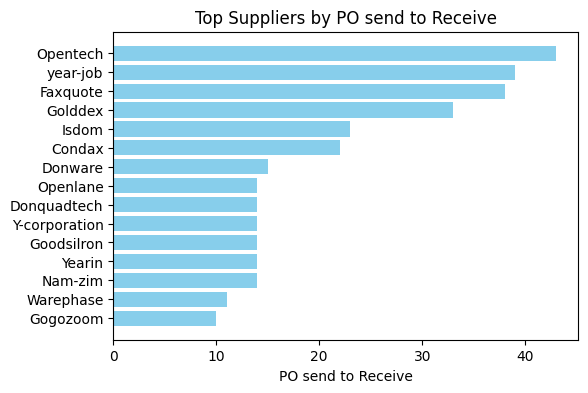

In [286]:
plt.figure(figsize=(6,4))
plt.barh(above8['Supplier Name'], above8['PO send to Receive'], color='skyblue')
plt.xlabel('PO send to Receive')
plt.title('Top Suppliers by PO send to Receive')
plt.gca().invert_yaxis() 
plt.show()

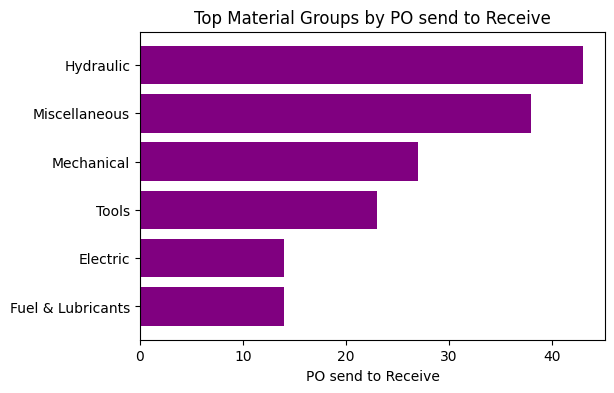

In [287]:
plt.figure(figsize=(6,4))
plt.barh(above8['Material Group'], above8['PO send to Receive'], color='purple')
plt.xlabel('PO send to Receive')
plt.title('Top Material Groups by PO send to Receive')
plt.gca().invert_yaxis() 
plt.show()

**Analysis of the lead time of Po creation to PO approval**

In [288]:
standard_process_wide.loc[:, 'Create Purchase Order'] = pd.to_datetime(standard_process_wide['Create Purchase Order'])
standard_process_wide.loc[:, 'Auth Send PO'] = pd.to_datetime(standard_process_wide['Auth Send PO'])

In [289]:
standard_process_wide.loc[:, 'Po creation to Approval'] = (standard_process_wide['Auth Send PO'] - standard_process_wide['Create Purchase Order']).dt.days

C:\Users\lily\AppData\Local\Temp\ipykernel_9168\426437815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_process_wide.loc[:, 'Po creation to Approval'] = (standard_process_wide['Auth Send PO'] - standard_process_wide['Create Purchase Order']).dt.days


In [290]:
standard_process_wide.sort_values(by='Po creation to Approval', ascending=False).head()

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,...,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur),PO send to Receive,Po creation to Approval
42,1043,30100169.0,40300166.0,2020-10-08 12:40:00,2020-10-09 11:36:00.000,NaT,2020-10-10 14:16:00,2020-11-16 08:24:00,NaT,2020-11-21 08:24:00,...,NaN,JokeF,FritsS,NaN,PeterL,Isdom,Mechanical,10072.03,5,36
250,1251,30100258.0,40300407.0,2020-10-20 15:31:00,2020-10-20 18:33:44.160,NaT,2020-10-24 15:31:00,2020-11-25 23:47:13,NaT,2020-11-27 02:03:53,...,NaN,EdjeK,FritsS,NaN,PeterL,Isdom,Tools,329.37,1,32
162,1163,30100395.0,40300320.0,2020-10-27 15:08:00,2020-10-30 18:23:00.000,NaT,2020-10-31 14:09:00,2020-11-23 12:49:31,NaT,2020-11-24 16:00:00,...,NaN,MauricedB,RobvdL,NaN,PeterL,Isdom,Tools,612.43,1,22
303,1304,30100365.0,40300457.0,2020-10-26 14:39:00,2020-10-29 10:39:00.000,NaT,2020-10-30 14:39:00,2020-11-19 19:35:21,NaT,2020-11-23 23:04:00,...,NaN,EdjeK,RobvdL,NaN,PeterL,Condax,Mechanical,7720.05,4,20
47,1048,30100127.0,40300176.0,2020-10-07 15:10:00,2020-10-09 19:27:00.000,NaT,2020-10-12 09:00:00,2020-10-31 09:58:00,NaT,2020-11-15 09:58:00,...,NaN,MauricedB,RobvdL,NaN,OlafO,Faxquote,Mechanical,6847.06,15,19


In [291]:
above5 = standard_process_wide.sort_values(by='Po creation to Approval', ascending=False)

In [292]:
above5 = above5[above5['Po creation to Approval'] >=5]
above5.head()

,CaseID,PR_Number,PO_Number,Create PR,Authorize PR,Reject PR,Create Purchase Order,Auth Send PO,Reject PO,Receive Goods,...,Actor_Reject PR,Actor_Create Purchase Order,Actor_Auth Send PO,Actor_Reject PO,Actor_Receive Goods,Supplier Name,Material Group,Purchase Value (eur),PO send to Receive,Po creation to Approval
42,1043,30100169.0,40300166.0,2020-10-08 12:40:00,2020-10-09 11:36:00.000,NaT,2020-10-10 14:16:00,2020-11-16 08:24:00,NaT,2020-11-21 08:24:00,...,NaN,JokeF,FritsS,NaN,PeterL,Isdom,Mechanical,10072.03,5,36
250,1251,30100258.0,40300407.0,2020-10-20 15:31:00,2020-10-20 18:33:44.160,NaT,2020-10-24 15:31:00,2020-11-25 23:47:13,NaT,2020-11-27 02:03:53,...,NaN,EdjeK,FritsS,NaN,PeterL,Isdom,Tools,329.37,1,32
162,1163,30100395.0,40300320.0,2020-10-27 15:08:00,2020-10-30 18:23:00.000,NaT,2020-10-31 14:09:00,2020-11-23 12:49:31,NaT,2020-11-24 16:00:00,...,NaN,MauricedB,RobvdL,NaN,PeterL,Isdom,Tools,612.43,1,22
303,1304,30100365.0,40300457.0,2020-10-26 14:39:00,2020-10-29 10:39:00.000,NaT,2020-10-30 14:39:00,2020-11-19 19:35:21,NaT,2020-11-23 23:04:00,...,NaN,EdjeK,RobvdL,NaN,PeterL,Condax,Mechanical,7720.05,4,20
47,1048,30100127.0,40300176.0,2020-10-07 15:10:00,2020-10-09 19:27:00.000,NaT,2020-10-12 09:00:00,2020-10-31 09:58:00,NaT,2020-11-15 09:58:00,...,NaN,MauricedB,RobvdL,NaN,OlafO,Faxquote,Mechanical,6847.06,15,19


In [293]:
above5 = above5[['CaseID', 'PO_Number', 'Actor_Auth Send PO','Material Group', 'Supplier Name', 'Purchase Value (eur)','Po creation to Approval']]

In [294]:
above5.head()

,CaseID,PO_Number,Actor_Auth Send PO,Material Group,Supplier Name,Purchase Value (eur),Po creation to Approval
42,1043,40300166.0,FritsS,Mechanical,Isdom,10072.03,36
250,1251,40300407.0,FritsS,Tools,Isdom,329.37,32
162,1163,40300320.0,RobvdL,Tools,Isdom,612.43,22
303,1304,40300457.0,RobvdL,Mechanical,Condax,7720.05,20
47,1048,40300176.0,RobvdL,Mechanical,Faxquote,6847.06,19


In [295]:
approvers_above5 = above5['Actor_Auth Send PO'].value_counts().reset_index()
approvers_above5

,Actor_Auth Send PO,count
0,RobvdL,23
1,FritsS,15
2,EdjeK,1


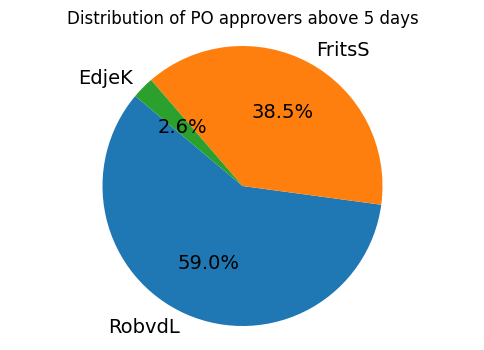

In [296]:
plt.figure(figsize=(6,4))
plt.pie(approvers_above5['count'], labels=approvers_above5['Actor_Auth Send PO'], autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})
plt.title('Distribution of PO approvers above 5 days')
plt.axis('equal')
plt.show()

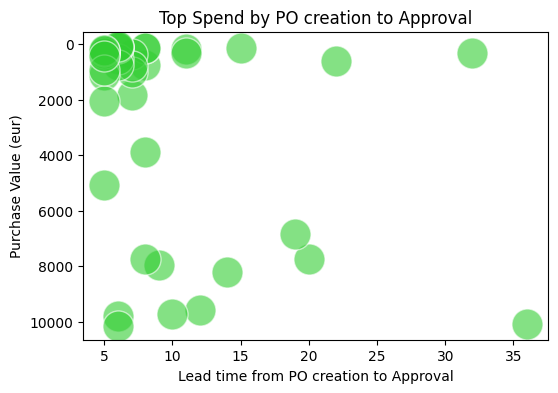

In [297]:
plt.figure(figsize=(6,4))
plt.scatter(above5['Po creation to Approval'], above5['Purchase Value (eur)'], s=500, c='limegreen', alpha=0.6, edgecolors='w')
plt.xlabel('Lead time from PO creation to Approval')
plt.ylabel('Purchase Value (eur)')
plt.title('Top Spend by PO creation to Approval')
plt.gca().invert_yaxis() 
plt.show()

In [298]:
29/438

0.06621004566210045